In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import re
import Functions

In [2]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score
from scipy.stats import ks_2samp

In [3]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import warnings

In [5]:

df = pd.read_csv("/Users/user/Documents/Spam_Detection/Data/mail_data.csv") #PATH


In [6]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.shape

(5572, 2)

In [8]:
df.tail

<bound method NDFrame.tail of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [9]:
df=df.drop_duplicates()

In [10]:
df.shape

(5157, 2)

In [11]:
df.tail

<bound method NDFrame.tail of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5157 rows x 2 columns]>

In [12]:
df.describe()

,Category,Message
count,5157,5157
unique,2,5157
top,ham,Rofl. Its true to its name
freq,4516,1


In [13]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [14]:
df=df.reset_index()

In [15]:
df.shape

(5157, 3)

In [16]:
df['Category'].value_counts()

Category
ham     4516
spam     641
Name: count, dtype: int64

In [17]:
df.replace({'Category':{'ham':0,'spam':1}},inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_8152\3603070565.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Category':{'ham':0,'spam':1}},inplace=True)


In [18]:
df.shape

(5157, 3)

In [19]:
df.head()

,index,Category,Message
0,0,0,"Go until jurong point, crazy.. Available only ..."
1,1,0,Ok lar... Joking wif u oni...
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,0,U dun say so early hor... U c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5157 entries, 0 to 5156
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     5157 non-null   int64 
 1   Category  5157 non-null   int64 
 2   Message   5157 non-null   object
dtypes: int64(2), object(1)
memory usage: 121.0+ KB


<Axes: xlabel='Category', ylabel='count'>

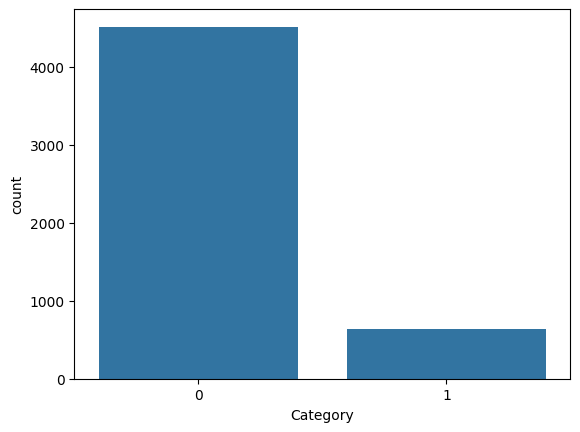

In [21]:
sns.countplot(x='Category',data = df)

In [22]:
ham_messages = df[df['Category'] == 0]['Message']
spam_messages = df[df['Category'] == 1]['Message']

ham_text = ' '.join(ham_messages)
spam_text = ' '.join(spam_messages)

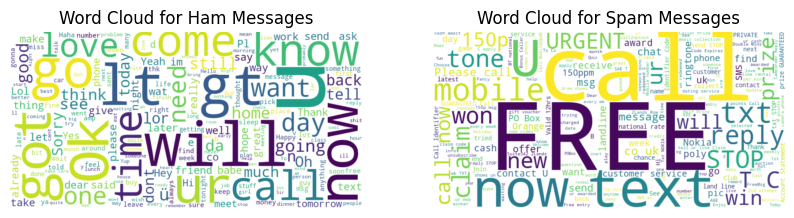

In [23]:
Functions.wordcloudplot(ham_text,spam_text)

In [24]:
X = df['Message']
Y = df['Category']

In [25]:
X.shape

(5157,)

In [26]:
Y.shape

(5157,)

In [27]:
X=np.array(Functions.change_format(X))

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

tfidf = CountVectorizer()
X = tfidf.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [30]:
models = {
    "Logistic Regression":LogisticRegression(),
    "Naive Bayes":MultinomialNB(),
    "Random Forest":RandomForestClassifier(),
    "KNN":KNeighborsClassifier(),
    "XgBoostclassifier":xgb.XGBClassifier()}

In [ ]:
Functions.train_model(models,X_train,y_train,X_test,y_test)

Model: Logistic Regression
, Accuracy_Score: 0.9738372093023255
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       897
           1       0.97      0.83      0.89       135

    accuracy                           0.97      1032
   macro avg       0.97      0.91      0.94      1032
weighted avg       0.97      0.97      0.97      1032

Model: Naive Bayes
, Accuracy_Score: 0.9641472868217055
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       897
           1       0.81      0.95      0.87       135

    accuracy                           0.96      1032
   macro avg       0.90      0.96      0.93      1032
weighted avg       0.97      0.96      0.97      1032

Model: Random Forest
, Accuracy_Score: 0.9796511627906976
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       897
           1       1.00      0.84      0.92       135

    

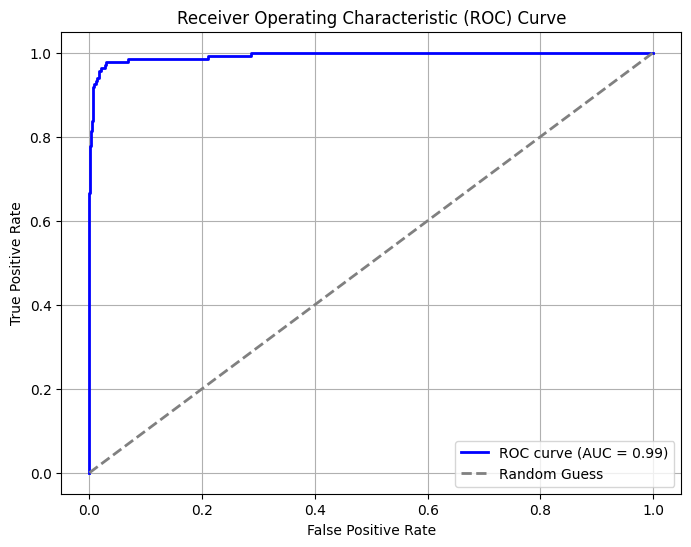

ROC-AUC Score for Logistic Regression: 0.9940


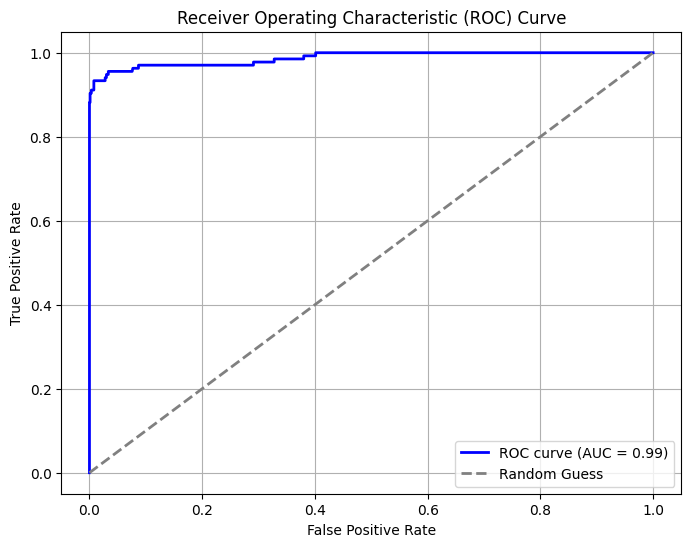

ROC-AUC Score for Naive Bayes: 0.9875


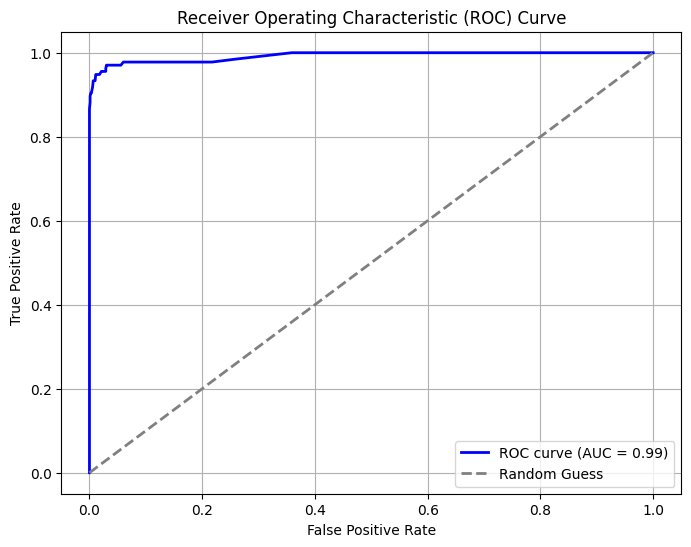

ROC-AUC Score for Random Forest: 0.9923


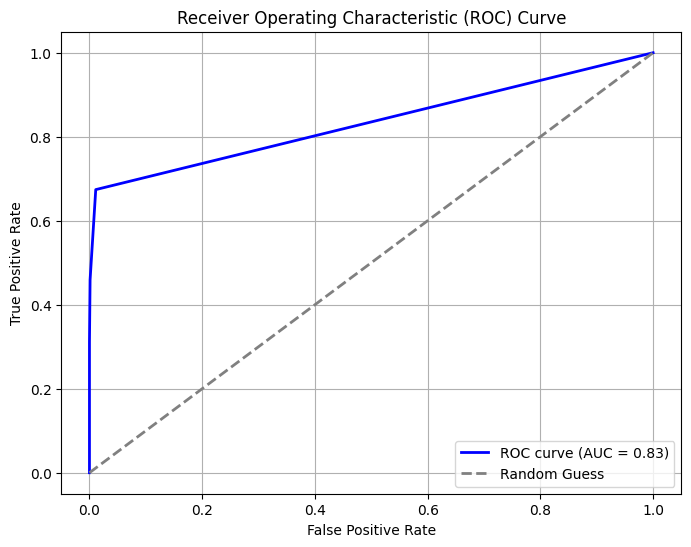

ROC-AUC Score for KNN: 0.8338


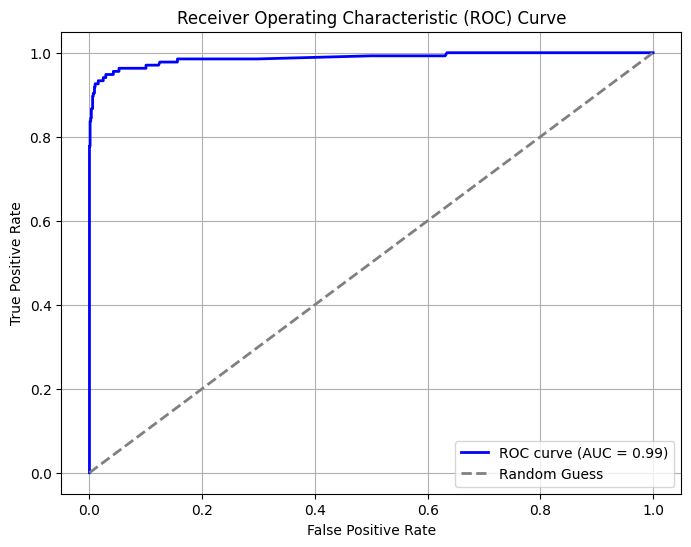

ROC-AUC Score for XgBoostclassifier: 0.9878


In [ ]:
Functions.roc_plot(models,X_test, y_test)

In [34]:
import pandas as pd

df_test = pd.read_csv("hf://datasets/zefang-liu/phishing-email-dataset/Phishing_Email.csv")

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
df_test.shape

(18650, 3)

In [36]:
df_test.head

<bound method NDFrame.head of        Unnamed: 0                                         Email Text  \
0               0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1               1  the other side of * galicismos * * galicismo *...   
2               2  re : equistar deal tickets are you still avail...   
3               3  \nHello I am your hot lil horny toy.\n    I am...   
4               4  software at incredibly low prices ( 86 % lower...   
...           ...                                                ...   
18645       18646  date a lonely housewife always wanted to date ...   
18646       18647  request submitted : access request for anita ....   
18647       18648  re : important - prc mtg hi dorn & john , as y...   
18648       18649  press clippings - letter on californian utilit...   
18649       18650                                              empty   

           Email Type  
0          Safe Email  
1          Safe Email  
2          Safe Email  
3      Ph

In [37]:
df_test=df_test[1:500]

In [38]:
df_test.shape

(499, 3)

In [39]:
df_test.isna().sum()

Unnamed: 0    0
Email Text    2
Email Type    0
dtype: int64

In [40]:
df_test.dropna

<bound method DataFrame.dropna of      Unnamed: 0                                         Email Text  \
1             1  the other side of * galicismos * * galicismo *...   
2             2  re : equistar deal tickets are you still avail...   
3             3  \nHello I am your hot lil horny toy.\n    I am...   
4             4  software at incredibly low prices ( 86 % lower...   
5             5  global risk management operations sally congra...   
..          ...                                                ...   
495         495  gpg windows 2000 / outlook project announcemen...   
496         496  qs : a question from ask - a-linguist hi there...   
497         497  re : hiring practices for summer interns charl...   
498         498  re : koch three rivers , # 6722 aimee , please...   
499         499  > "Around the world, there is a growing sense ...   

         Email Type  
1        Safe Email  
2        Safe Email  
3    Phishing Email  
4    Phishing Email  
5        Safe E

In [41]:
df_test=df_test['Email Text']

https://www.kaggle.com/datasets/abdmental01/email-spam-dedection